In [1]:
import scanpy as sc
import omicverse as ov
ov.plot_set(font_path='Arial')

# Enable auto-reload for development
%load_ext autoreload
%autoreload 2

üî¨ Starting plot initialization...
Using already downloaded Arial font from: /tmp/omicverse_arial.ttf
Registered as: Arial
üß¨ Detecting CUDA devices‚Ä¶
‚úÖ [GPU 0] NVIDIA H100 80GB HBM3
    ‚Ä¢ Total memory: 79.1 GB
    ‚Ä¢ Compute capability: 9.0

   ____            _     _    __                  
  / __ \____ ___  (_)___| |  / /__  _____________ 
 / / / / __ `__ \/ / ___/ | / / _ \/ ___/ ___/ _ \ 
/ /_/ / / / / / / / /__ | |/ /  __/ /  (__  )  __/ 
\____/_/ /_/ /_/_/\___/ |___/\___/_/  /____/\___/                                              

üîñ Version: 1.7.6rc1   üìö Tutorials: https://omicverse.readthedocs.io/
‚úÖ plot_set complete.



In [2]:
#!/usr/bin/env python3
import os
import requests
from tqdm import tqdm


output_dir = "llm_model/models/UCE"
os.makedirs(output_dir, exist_ok=True)

files_to_download = {
    "species_chrom.csv":         "https://figshare.com/ndownloader/files/42706558",
    "species_offsets.pkl":       "https://figshare.com/ndownloader/files/42706555",
    "all_tokens.torch":          "https://figshare.com/ndownloader/files/42706585",
    "4layer_model.torch":        "https://figshare.com/ndownloader/files/42706576",
    "33l_8ep_1024t_1280.torch":  "https://figshare.com/ndownloader/files/43423236",
    "protein_embeddings.tar.gz": "https://figshare.com/ndownloader/files/42715213",
}

for filename, url in files_to_download.items():
    filepath = os.path.join(output_dir, filename)
    
    resp = requests.get(url, stream=True)
    resp.raise_for_status()
    total = int(resp.headers.get('content-length', 0))
    
    
    with open(filepath, "wb") as f, tqdm(
        desc=f"Downloading {filename}",
        total=total,
        unit='iB',
        unit_scale=True,
        unit_divisor=1024,
    ) as bar:
        for chunk in resp.iter_content(chunk_size=8192):
            if chunk:
                f.write(chunk)
                bar.update(len(chunk))
    print(f"Saved to {filepath}")



Saved to llm_model/models/UCE/species_chrom.csv


Saved to llm_model/models/UCE/species_offsets.pkl


Saved to llm_model/models/UCE/all_tokens.torch


Saved to llm_model/models/UCE/4layer_model.torch


Saved to llm_model/models/UCE/33l_8ep_1024t_1280.torch


Saved to llm_model/models/UCE/protein_embeddings.tar.gz
ÊâÄÊúâÊñá‰ª∂‰∏ãËΩΩÂÆåÊàê„ÄÇ


In [3]:
import tarfile

# tar.gz Êñá‰ª∂Ë∑ØÂæÑ
archive_path = "llm_model/models/UCE/protein_embeddings.tar.gz"
# Ëß£ÂéãÁõÆÊ†áÁõÆÂΩï
extract_dir = "llm_model/models/UCE"

# ÊâìÂºÄÂπ∂Ëß£Âéã
with tarfile.open(archive_path, "r:gz") as tar:
    tar.extractall(path=extract_dir)

print(f" {archive_path} unzip to {extract_dir}")


 llm_model/models/UCE/protein_embeddings.tar.gz unzip to llm_model/models/UCE


In [16]:
!ls llm_model/models/UCE/protein_embeddings/

Danio_rerio.GRCz11.gene_symbol_to_embedding_ESM2.pt
Homo_sapiens.GRCh38.gene_symbol_to_embedding_ESM2.pt
Macaca_fascicularis.Macaca_fascicularis_6.0.gene_symbol_to_embedding_ESM2.pt
Macaca_mulatta.Mmul_10.gene_symbol_to_embedding_ESM2.pt
Microcebus_murinus.Mmur_3.0.gene_symbol_to_embedding_ESM2.pt
Mus_musculus.GRCm39.gene_symbol_to_embedding_ESM2.pt
Sus_scrofa.Sscrofa11.1.gene_symbol_to_embedding_ESM2.pt
Xenopus_tropicalis.Xenopus_tropicalis_v9.1.gene_symbol_to_embedding_ESM2.pt


In [2]:
manager = ov.llm.SCLLMManager(
    model_type="uce",
    model_path="llm_model/models/UCE/4layer_model.torch",
    token_file='llm_model/models/UCE/all_tokens.torch',
    protein_embeddings_dir='llm_model/models/UCE/protein_embeddings/',
    spec_chrom_csv_path='llm_model/models/UCE/species_chrom.csv',
    offset_pkl_path='llm_model/models/UCE/species_offsets.pkl',
    species='human',
    device='cuda'
)

[Loaded] UCE model initialized
[Loading] Loading UCE model and assets
[Loading] === UCE Asset Files Validation ===
[Loaded] ‚úì Model weights: llm_model/models/UCE/4layer_model.torch
[Loaded] ‚úì Token embeddings: llm_model/models/UCE/all_tokens.torch
[Loaded] ‚úì Species chromosome mapping: llm_model/models/UCE/species_chrom.csv
[Loaded] ‚úì Species offsets: llm_model/models/UCE/species_offsets.pkl
[Loaded] ‚úì Protein embeddings directory: llm_model/models/UCE/protein_embeddings
[Loaded] ‚úì Found protein embedding: Homo_sapiens.GRCh38.gene_symbol_to_embedding_ESM2.pt
[Loaded] ‚úì Found protein embedding: Mus_musculus.GRCm39.gene_symbol_to_embedding_ESM2.pt
[Loading] === UCE Configuration ===
[Loaded] ‚Ä¢ Species: human
[Loaded] ‚Ä¢ Batch size: 25
[Loaded] ‚Ä¢ Model layers: 4
[Loaded] ‚Ä¢ Output dimension: 1280
[Loaded] ‚Ä¢ Token dimension: 5120
[Loaded] ‚Ä¢ Hidden dimension: 5120
[Loading] === UCE Configuration ===
[Loaded] ‚úì Protein embeddings directory: llm_model/models/UCE/prot

In [3]:
adata1=ov.read('data/llm_test/neurips2021_s1d3.h5ad')
adata1.obs['batch']='s1d3'
adata2=ov.read('data/llm_test/neurips2021_s2d1.h5ad')
adata2.obs['batch']='s2d1'
adata3=ov.read('data/llm_test/neurips2021_s3d7.h5ad')
adata3.obs['batch']='s3d7'

In [4]:
adata=sc.concat([adata1,adata2,adata3],merge='same')
adata

AnnData object with n_obs √ó n_vars = 27423 √ó 13953
    obs: 'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'is_train'
    var: 'feature_types', 'gene_id'
    obsm: 'ADT_X_pca', 'ADT_X_umap', 'ADT_isotype_controls', 'GEX_X_pca', 'GEX_X_umap'
    layers: 'counts'

In [5]:
adata=ov.pp.preprocess(adata,mode='shiftlog|pearson',
                       n_HVGs=3000,batch_key=None,target_sum=1e4)
adata

Begin robust gene identification
After filtration, 13953/13953 genes are kept.     Among 13953 genes, 13953 genes are robust.
End of robust gene identification.
Begin size normalization: shiftlog and HVGs selection pearson
normalizing counts per cell
The following highly-expressed genes are not considered during normalization factor computation:
['IGKC', 'HBB', 'MALAT1', 'IGHA1', 'IGHM', 'HBA2', 'IGLC1', 'IGLC2', 'IGLC3']
    finished (0:00:00)
extracting highly variable genes
--> added
    'highly_variable', boolean vector (adata.var)
    'highly_variable_rank', float vector (adata.var)
    'highly_variable_nbatches', int vector (adata.var)
    'highly_variable_intersection', boolean vector (adata.var)
    'means', float vector (adata.var)
    'variances', float vector (adata.var)
    'residual_variances', float vector (adata.var)
Time to analyze data in cpu: 3.410970449447632 seconds.
End of size normalization: shiftlog and HVGs selection pearson


AnnData object with n_obs √ó n_vars = 27423 √ó 13953
    obs: 'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'is_train'
    var: 'feature_types', 'gene_id', 'n_cells', 'percent_cells', 'robust', 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable_features'
    uns: 'log1p', 'hvg', 'status', 'status_args', 'REFERENCE_MANU'
    obsm: 'ADT_X_pca', 'ADT_X_umap', 'ADT_isotype_controls', 'GEX_X_pca', 'GEX_X_umap'
    layers: 'counts'

### zero-shot embedding

In [6]:
#sc.pp.subsample(adata,0.1)

In [7]:
embeddings = manager.get_embeddings(
    adata,filter_cells=False,filter_genes=False
)
print(f"embedding: {embeddings.shape}")

adata.obsm['X_uce'] = embeddings

Detected kernel version 3.10.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.


[Embedding] Extracting cell embeddings using UCE
[Embedding] Processing data in memory
[Embedding] UCE model loaded and ready for inference
[Embedding] Creating UCE dataset in memory


UCE inference:   0%|          | 0/1097 [00:00<?, ?it/s]

[Embedding] Extracted embeddings: (27423, 1280)
embedding: (27423, 1280)


computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:24)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm)
    'umap', UMAP parameters (adata.uns) (0:00:19)


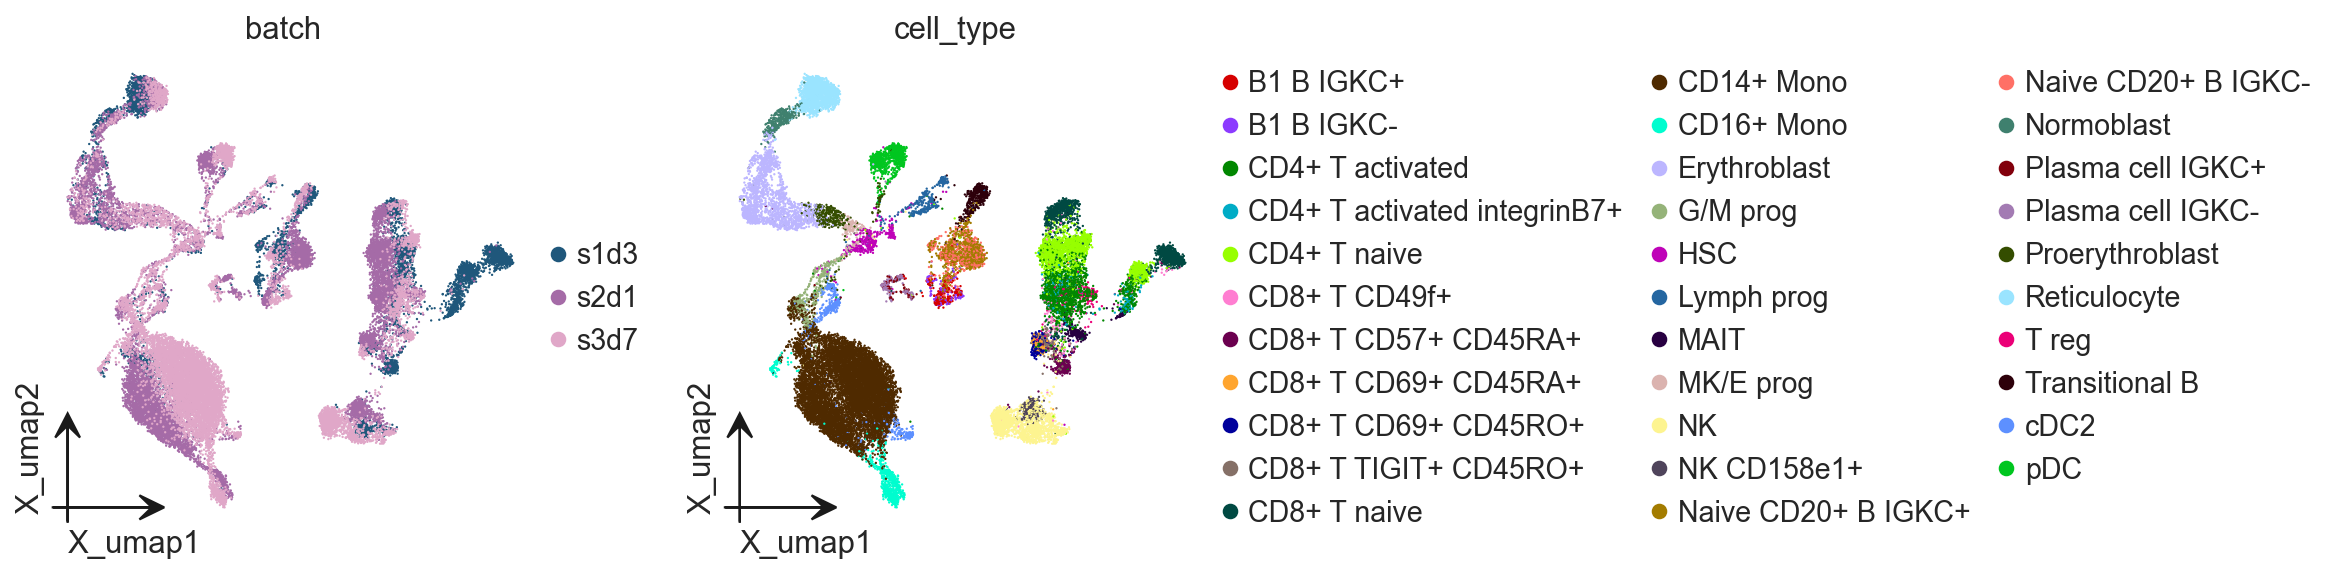

In [8]:
sc.pp.neighbors(adata, use_rep='X_uce')
sc.tl.umap(adata)
ov.pl.embedding(
    adata, 
    basis='X_umap',
    color=['batch', 'cell_type']
)

Detected kernel version 3.10.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.


üîó Performing batch integration for 27423 cells
Extracting embeddings for integration
[Embedding] Extracting cell embeddings using UCE
[Embedding] Processing data in memory
[Embedding] UCE model loaded and ready for inference
[Embedding] Creating UCE dataset in memory


UCE inference:   0%|          | 0/1097 [00:00<?, ?it/s]

[Embedding] Extracted embeddings: (27423, 1280)


Batch integration:   0%|                                                      | 0/2 [00:00<?, ?it/s]

Applying MNN correction
MNN correction applied to 3 batches
Integration completed with mnn correction
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:06)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm)
    'umap', UMAP parameters (adata.uns) (0:00:18)


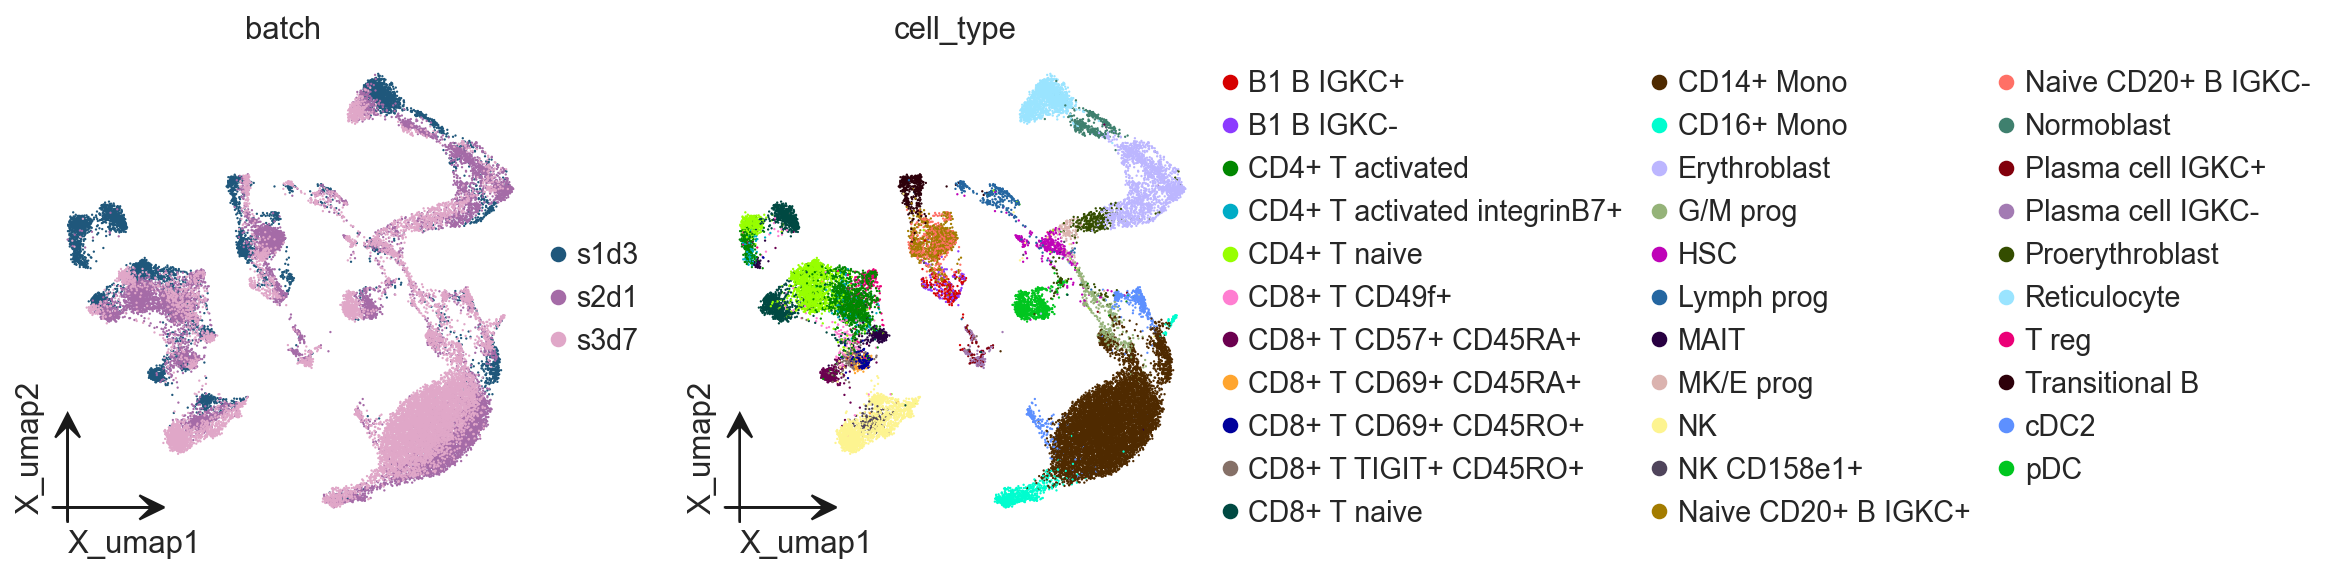

In [9]:
zero_shot_results = manager.model.integrate(
    adata,
    batch_key="batch",
    correction_method="mnn",
)
adata.obsm['X_uce_mnn'] = zero_shot_results['embeddings']
sc.pp.neighbors(adata, use_rep='X_uce_mnn')
sc.tl.umap(adata)
ov.pl.embedding(
    adata, 
    basis='X_umap',
    color=['batch', 'cell_type']
)

## fine-tune linear

In [10]:
reference_adata=adata[adata.obs['batch']=='s1d3']

In [11]:
reference_adata.obs['celltype']=reference_adata.obs['cell_type'].copy()

In [15]:
fine_tune_results = manager.model.fine_tune(
    train_adata=reference_adata,
    epochs=10,           # 
    batch_size=32,       # 
    lr=1e-4,            # 
    freeze_backbone=True 
)

[Fine-tuning] üéØ Starting UCE linear probing fine-tuning for cell type annotation
[‚ÑπÔ∏èInfo] Found 30 cell types
[Preprocessing] Preprocessing data for UCE


Detected kernel version 3.10.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.


[Preprocessing] Preprocessed data: 5935 cells √ó 13953 genes
[Preprocessing] Pre-computing UCE embeddings for linear probing...
[Embedding] Extracting cell embeddings using UCE
[Embedding] Processing data in memory
[Embedding] UCE model loaded and ready for inference
[Embedding] Creating UCE dataset in memory


UCE inference:   0%|          | 0/238 [00:00<?, ?it/s]

[Embedding] Extracted embeddings: (5935, 1280)
[Preprocessing] Pre-computed embeddings: train=(5935, 1280)
[Training] Starting linear probing training for 10 epochs


Linear Probing:   0%|          | 0/10 [00:00<?]

[Fine-tuning] ‚úÖ UCE fine-tuning completed successfully


### integrated

In [25]:
zero_shot_results = manager.model.integrate(
    adata,
    batch_key="batch",
    correction_method="mnn",
)
adata.obsm['X_uce_fine'] = zero_shot_results['embeddings']

Detected kernel version 3.10.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.


üîóüéØ Performing batch integration using fine-tuned UCE for 27423 cells
Extracting embeddings for integration
Using original UCE model for integration (backbone frozen)
[Embedding] Processing data in memory
[Embedding] UCE model loaded and ready for inference
[Embedding] Creating UCE dataset in memory


UCE inference:   0%|          | 0/1097 [00:00<?, ?it/s]

Batch integration:   0%|                                                      | 0/2 [00:00<?, ?it/s]

Applying MNN correction
MNN correction applied to 3 batches
Integration completed with mnn correction


computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:06)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm)
    'umap', UMAP parameters (adata.uns) (0:00:18)


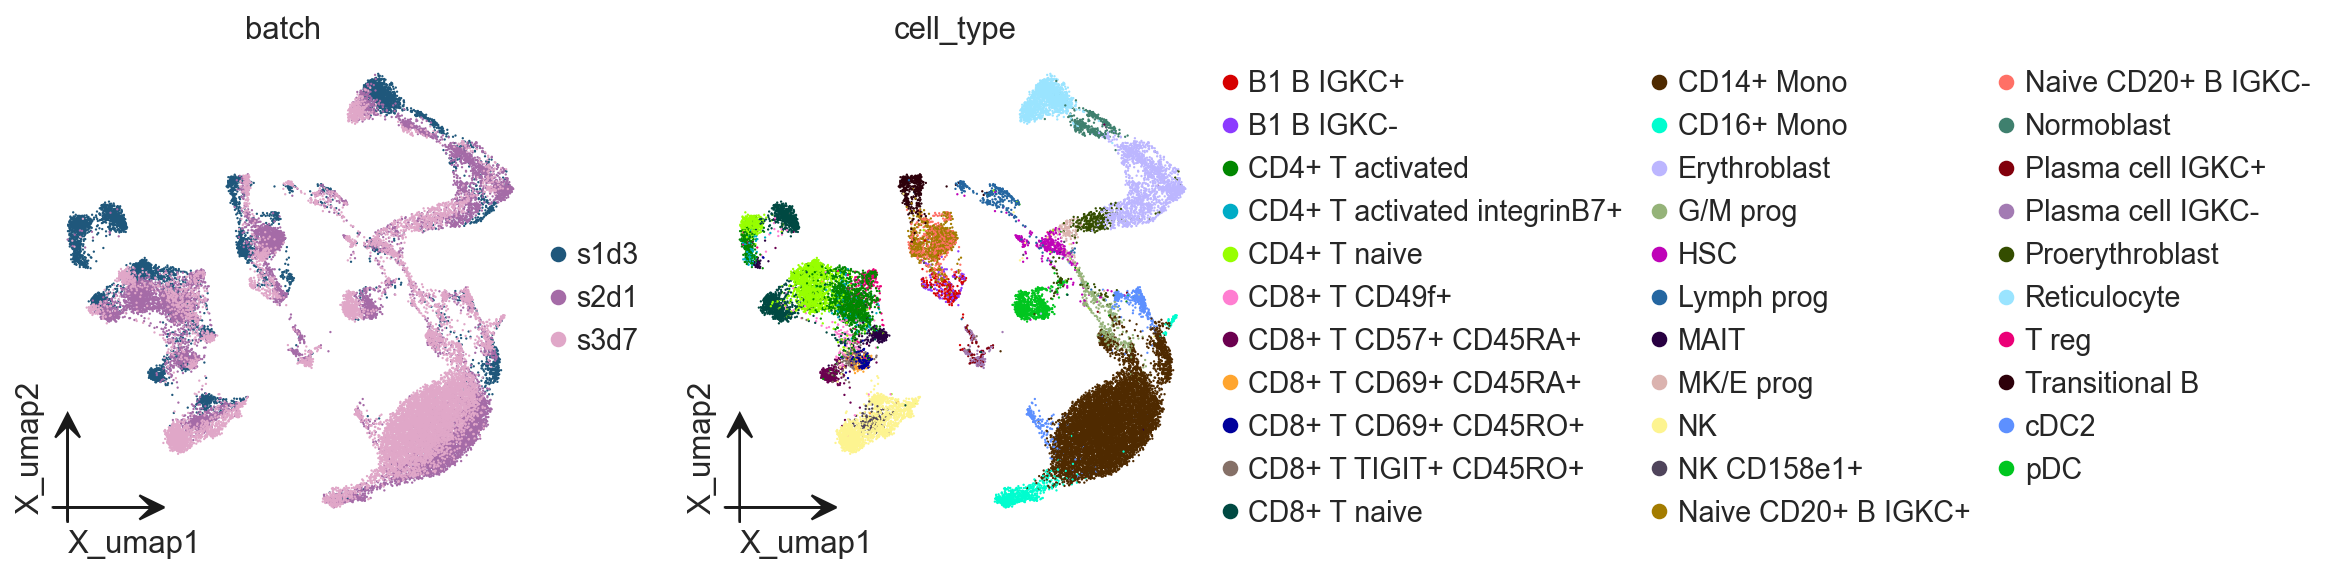

In [26]:
sc.pp.neighbors(adata, use_rep='X_uce_fine')
sc.tl.umap(adata)
ov.pl.embedding(
    adata, 
    basis='X_umap',
    color=['batch', 'cell_type']
)

### annotation

In [21]:
prediction_results = manager.model.predict(
    adata,
    task='annotation',
)

#adata.obs['predicted_celltype'] = prediction_results['predicted_celltypes']
adata.obs['predicted_celltype'] = prediction_results['predictions']

[Predicting] Predicting cell types using fine-tuned UCE model
[Preprocessing] Preprocessing data for UCE


Detected kernel version 3.10.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.


[Preprocessing] Preprocessed data: 27423 cells √ó 13953 genes
[Predicting] Using linear probing model for prediction
[Embedding] Computing embeddings for linear probing prediction...
[Embedding] Using original UCE model for embeddings (backbone frozen)
[Embedding] Processing data in memory
[Embedding] UCE model loaded and ready for inference
[Embedding] Creating UCE dataset in memory


UCE inference:   0%|          | 0/1097 [00:00<?, ?it/s]

[Embedding] Generated embeddings: (27423, 1280)
[Predicting] Predicted cell types for 27423 cells


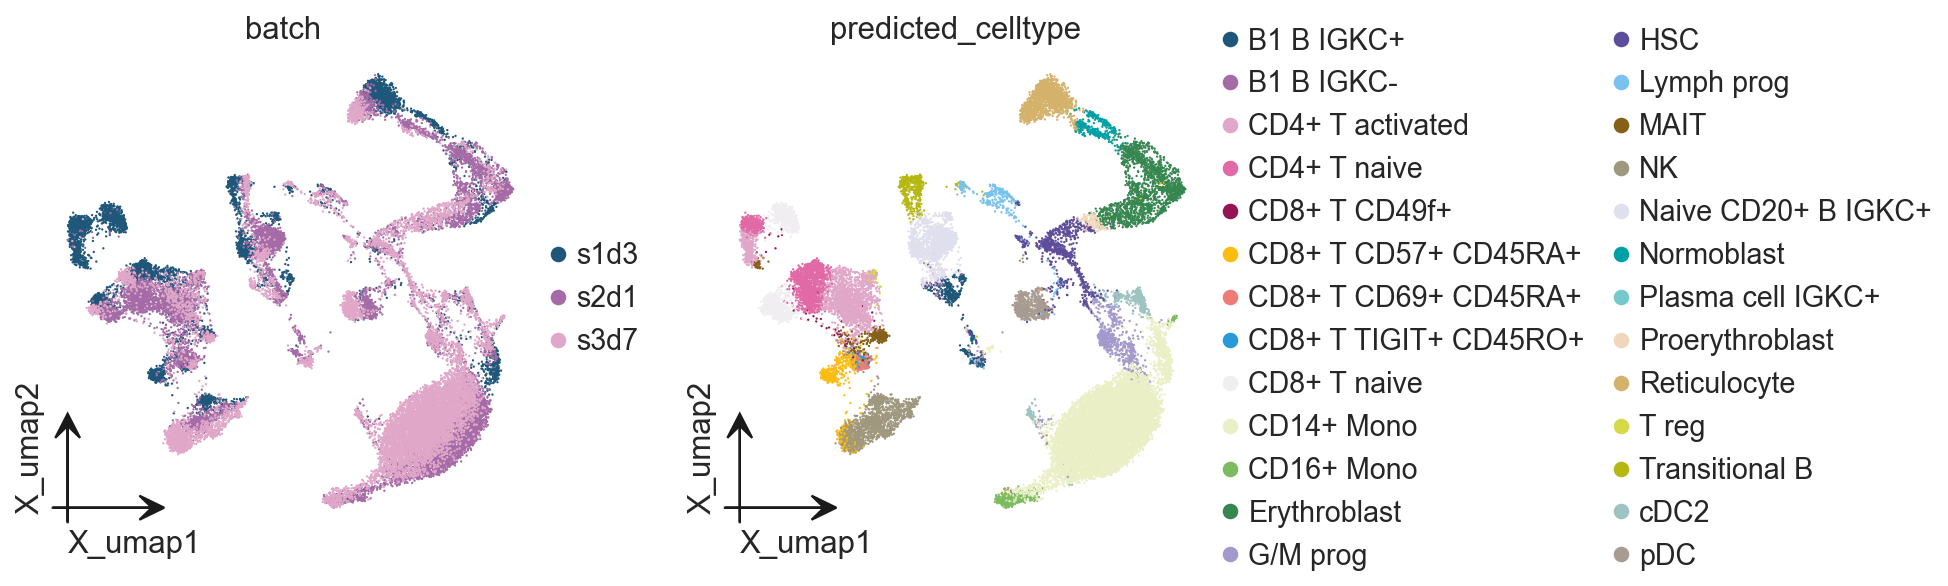

In [22]:
ov.pl.embedding(
    adata, 
    basis='X_umap',
    color=['batch', 'predicted_celltype']
)

## fine-tune ene to end

In [8]:
reference_adata=adata[adata.obs['batch']=='s1d3']

In [9]:
reference_adata.obs['celltype']=reference_adata.obs['cell_type'].copy()

In [10]:
fine_tune_results = manager.model.fine_tune(
    train_adata=reference_adata,
    epochs=10,           # 
    batch_size=32,       # 
    lr=1e-4,            # 
    freeze_backbone=False 
)

[Fine-tuning] üéØ Starting UCE end-to-end fine-tuning for cell type annotation
[‚ÑπÔ∏èInfo] Found 30 cell types
[‚ÑπÔ∏èInfo] UCE backbone unfrozen - end-to-end fine-tuning mode
[Preprocessing] Preprocessing data for UCE
[Preprocessing] Preprocessed data: 5935 cells √ó 13953 genes
[Preprocessing] Preparing UCE raw data for end-to-end training...
[Warning] Warning: 2155 genes not found in UCE protein embeddings
[Warning] First 10 missing genes: ['AL627309.5', 'LINC01409', 'LINC01128', 'LINC00115', 'FAM41C', 'MRPL20-AS1', 'AL645728.1', 'AL691432.2', 'FO704657.1', 'SLC35E2A']...
[Warning] Filtered data to 11798 valid genes
[Preprocessing] Raw UCE data prepared: (5935, 11798)
[Fine-tuning] üéØ Epoch 1/20 completed - Loss: 2.3958, Acc: 0.4711
[Fine-tuning] üéØ Epoch 2/20 completed - Loss: 1.1964, Acc: 0.6755
[Fine-tuning] üéØ Epoch 3/20 completed - Loss: 0.9449, Acc: 0.7154
[Fine-tuning] üéØ Epoch 4/20 completed - Loss: 0.7901, Acc: 0.7515
[Fine-tuning] üéØ Epoch 5/20 completed - Loss:

### integrate

In [11]:
zero_shot_results = manager.model.integrate(
    adata,
    batch_key="batch",
    correction_method="mnn",
)
adata.obsm['X_uce_fine'] = zero_shot_results['embeddings']

üîóüéØ Performing batch integration using fine-tuned UCE for 27423 cells
Extracting embeddings for integration
[Embedding] üéØ Extracting embeddings using fine-tuned UCE model
[Preprocessing] Preprocessing data for UCE
[Preprocessing] Preprocessed data: 27423 cells √ó 13953 genes
[Preprocessing] Preparing UCE raw data for end-to-end training...
[Warning] Warning: 2155 genes not found in UCE protein embeddings
[Warning] First 10 missing genes: ['AL627309.5', 'LINC01409', 'LINC01128', 'LINC00115', 'FAM41C', 'MRPL20-AS1', 'AL645728.1', 'AL691432.2', 'FO704657.1', 'SLC35E2A']...
[Warning] Filtered data to 11798 valid genes
[Preprocessing] Raw UCE data prepared: (27423, 11798)
[Embedding] Extracted embeddings from fine-tuned UCE: (27423, 1280)


Batch integration:   0%|                                                      | 0/2 [00:00<?, ?it/s]

Applying MNN correction
MNN correction applied to 3 batches
Integration completed with mnn correction


computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:05)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm)
    'umap', UMAP parameters (adata.uns) (0:00:17)


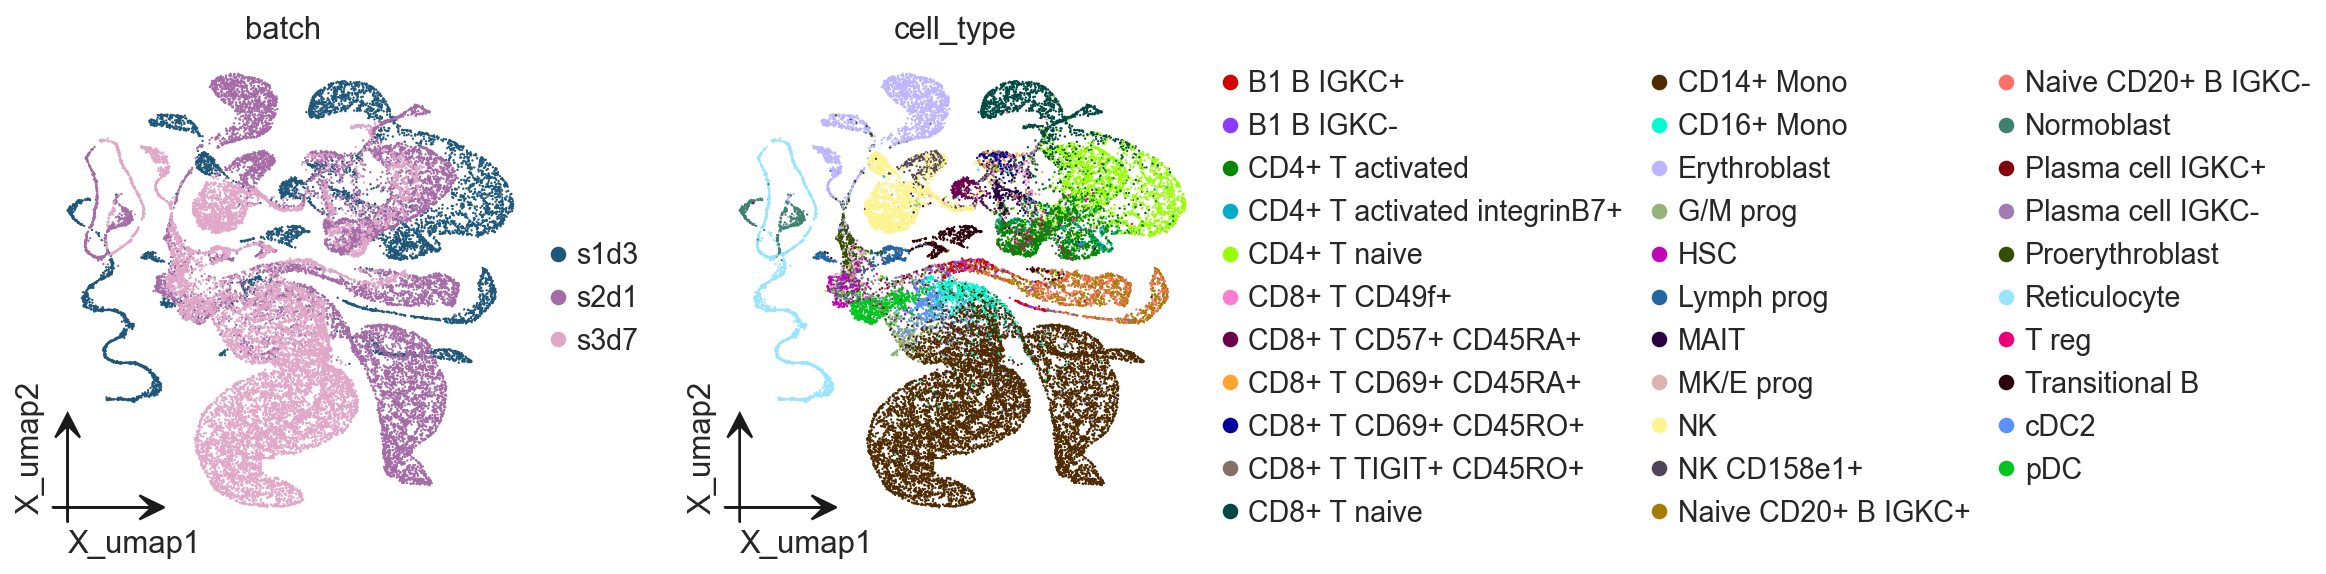

In [12]:
sc.pp.neighbors(adata, use_rep='X_uce_fine')
sc.tl.umap(adata)
ov.pl.embedding(
    adata, 
    basis='X_umap',
    color=['batch', 'cell_type']
)

### annotation

In [13]:
prediction_results = manager.model.predict(
    adata,
    task='annotation',
)

#adata.obs['predicted_celltype'] = prediction_results['predicted_celltypes']
adata.obs['predicted_celltype'] = prediction_results['predictions']

[Predicting] Predicting cell types using fine-tuned UCE model
[Preprocessing] Preprocessing data for UCE
[Preprocessing] Preprocessed data: 27423 cells √ó 13953 genes
[Preprocessing] Preparing UCE raw data for end-to-end training...
[Warning] Warning: 2155 genes not found in UCE protein embeddings
[Warning] First 10 missing genes: ['AL627309.5', 'LINC01409', 'LINC01128', 'LINC00115', 'FAM41C', 'MRPL20-AS1', 'AL645728.1', 'AL691432.2', 'FO704657.1', 'SLC35E2A']...
[Warning] Filtered data to 11798 valid genes
[Preprocessing] Raw UCE data prepared: (27423, 11798)
[Predicting] Predicted cell types for 27423 cells


In [14]:
ov.pl.embedding(
    adata, 
    basis='X_umap',
    color=['batch', 'predicted_celltype']
)